In [295]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## connection to the database

In [296]:
con = sqlite3.connect("../data/checking-logs.sqlite")

 ##  datetime from the pageviews table

In [297]:
df = pd.io.sql.read_sql(sql="SELECT datetime FROM pageviews WHERE uid LIKE 'user_%'", 
parse_dates=['datetime'],
con=con)
df2 = pd.io.sql.read_sql(sql="SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", 
parse_dates=['timestamp'], con=con)

##  a new dataframe where the visits are counted and grouped by date

In [298]:
df = df.groupby([df['datetime'].dt.date]).count()
df2 = df2.groupby([df2['timestamp'].dt.date]).count()
df.columns = ["views"]
df2.columns = ["commits"]
df.index.name = 'date'
df2.index.name = 'date'
new_df = pd.concat([df, df2], axis=1).dropna()

<AxesSubplot: title={'center': 'Views and commits per day'}, xlabel='date'>

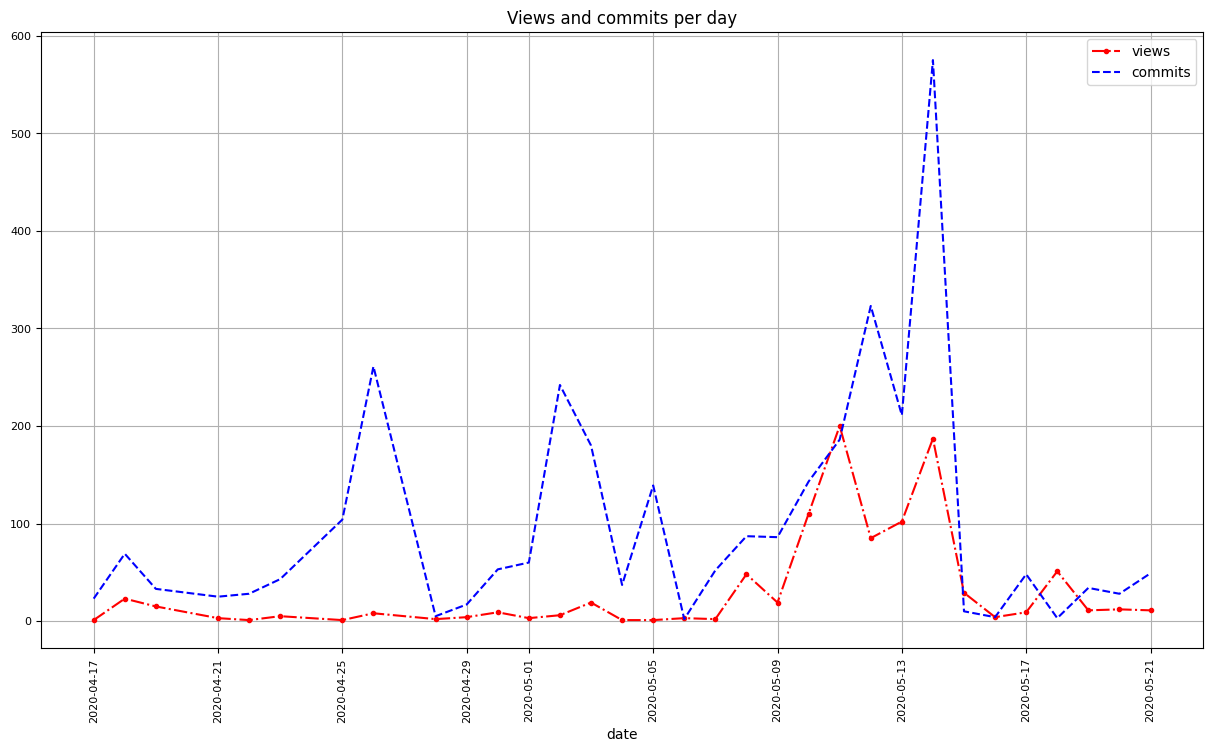

In [299]:
new_df.plot(colormap='bwr_r', grid=[1, 1], style=['.-.', '--'], fontsize=8, figsize=(15,8), title='Views and commits per day', rot=90)

## Close connection

In [300]:
con.close()